In [1]:
import pandas as pd

df = pd.read_csv("kaggle_survey_2017_2021.csv", low_memory=False)
print(df.shape)
df.head()


(106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df["year"] = pd.to_numeric(df["-"], errors="coerce")
df = df[df["year"].between(2017, 2021)]


In [3]:
cols = ["year","Q1","Q2","Q3","Q4","Q5","Q6"] + [c for c in df.columns if c.startswith("Q7_Part")]
df = df[cols]


In [4]:
import numpy as np

for c in df.columns:
    if df[c].dtype == "object":
        df[c] = df[c].str.strip().replace({"": np.nan, "None": np.nan})

df["gender"] = df["Q2"].replace({"Man":"Male","Woman":"Female"})


/tmp/ipython-input-2752232022.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].str.strip().replace({"": np.nan, "None": np.nan})


In [5]:
print(df["Q1"].value_counts().head(10))


Q1
25-29    23748
22-24    19662
30-34    16144
18-21    15159
35-39    10868
40-44     7327
45-49     4996
50-54     3514
55-59     2112
60-69     1851
Name: count, dtype: int64


In [6]:
print(df["gender"].value_counts())


gender
Male                                                 85565
Female                                               18768
Prefer not to say                                     1276
Prefer to self-describe                                224
A different identity                                   159
Nonbinary                                              140
Non-binary, genderqueer, or gender non-conforming       74
Name: count, dtype: int64


In [7]:
print(df["Q3"].value_counts().head(10))


Q3
India                                                   25192
United States of America                                12688
Other                                                    5771
United States                                            4197
China                                                    3506
Russia                                                   3407
Brazil                                                   3374
Japan                                                    3106
Germany                                                  2599
United Kingdom of Great Britain and Northern Ireland     2223
Name: count, dtype: int64


In [8]:
print(df["Q4"].value_counts().head(10))


Q4
Masterâ€™s degree                                                      37395
Bachelorâ€™s degree                                                    29961
Doctoral degree                                                        13568
Master's degree                                                         6273
Bachelor's degree                                                       4811
Some college/university study without earning a bachelorâ€™s degree     4631
Professional degree                                                     2360
I prefer not to answer                                                  1794
No formal education past high school                                    1122
Some college/university study without earning a bachelor's degree        786
Name: count, dtype: int64


In [9]:
lang_cols = [c for c in df.columns if c.startswith("Q7_Part")]
lang_long = df[lang_cols].melt(value_name="language")["language"].dropna()
print(lang_long.value_counts().head(10))


language
Python                   65942
SQL                      33090
R                        20884
Java                     14402
C++                      11618
C                         9696
Javascript                9501
MATLAB                    9320
Bash                      8737
Javascript/Typescript     3249
Name: count, dtype: int64


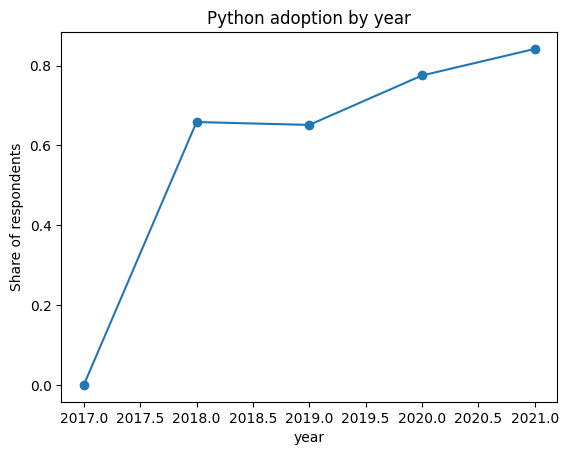

In [10]:
import matplotlib.pyplot as plt

python_mask = (df[lang_cols] == "Python").any(axis=1)
share = python_mask.groupby(df["year"]).mean()

share.plot(marker="o")
plt.title("Python adoption by year")
plt.ylabel("Share of respondents")
plt.show()


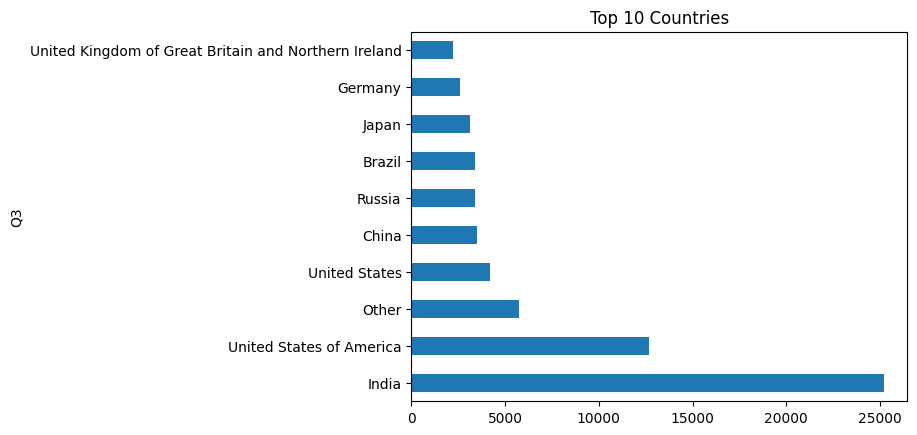

In [11]:
df["Q3"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Countries")
plt.show()
